# 2023年度 実世界情報実験１　画像処理テーマ

## 第4課題ファイル

第4課題ファイルでは少し高度な画像処理について、
実際にプログラムを動かしながら学ぶ。
中身の詳しいアルゴリズムや処理の原理についてはここでは
細かくチェックしないが、OpenCVに標準搭載された実用的な
モジュールを紹介しているので、色々な画像や設定で試して
みること。

## 補足


高度な画像処理を行う場合、画像の解像度が高いと実行に非常に
時間やメモリを要する場合がある。
また、提出時のファイルサイズが非常に大きくなることもある。

特に自分で撮影した画像を用いる場合、必要に応じて縮小した画像を
用いて実験を行うとよい。
OpenCVの `cv2.resize()` 関数を用いると簡単に縮小することができる。
[OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 »
画像の幾何変換 » スケーリング(拡大・縮小)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#id4)
の項を参考にすればよい。

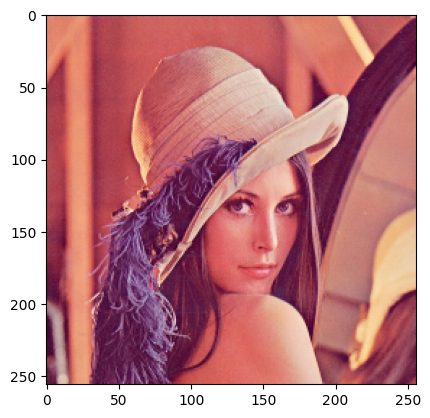

In [ ]:
# 画像の縮小の例
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')
height, width = img.shape[:2]
reduced_img = cv2.resize(img,(width//2, height//2), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('reduced_lena.png', reduced_img)
plt.imshow(cv2.cvtColor(reduced_img,cv2.COLOR_BGR2RGB))

## ハフ変換
- <a href="http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html">OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » ハフ変換による直線検出</a>
- <a href="http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_houghcircles/py_houghcircles.html">OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » ハフ変換による円検出</a>

エッジ画像からハフ変換は直線や円（さらには特定の図形）を検出するのに用いられる。
添付の画像ファイル `sudoku.png` を用いて
チュートリアルのコードを参考に `cv2.HoughLines` 関数の動作を
確認せよ。
（添付の画像は https://github.com/opencv/opencv/tree/master/samples/data から取得した）


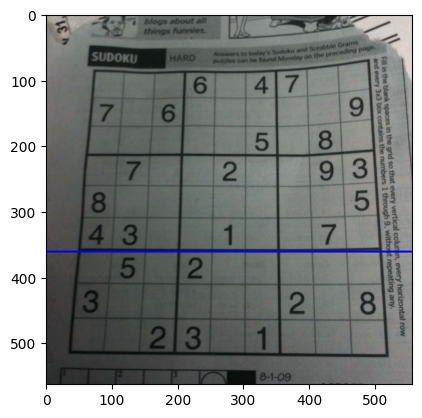

In [ ]:
# チュートリアル
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img)

### 課題 4-1
現在のGoogle Colaboratoryのデフォルトの環境(OpenCV 4.1.2)
で上記サイトのチュートリアルのコードをそのまま実行すると
１本の直線しか図示されない。
これはチュートリアルではOpenCV 2.x系を想定しているためと
思われる。
そこで `cv2.HoughLines()` 関数の仕様や返り値を確認し、
検出した直線についての情報がどのように格納されているか
把握せよ。
その後、検出された直線の本数を `print()` 関数で表示しつつ、
検出されたすべての直線を図示するようにコードを変更せよ。

エッジ画像を生成するための`Canny()` 関数呼び出し時の
第2, 第3引数の値を変えることによって検出される
直線は増減するので必要であれば適宜調整すること。

これを `sudoku.png` に適用した結果を表示し、
画像ファイルとして保存せよ。
プログラムコードだけでなく、生成結果の画像も
画像ファイルとして提出すること。
結果のファイル名は `lesson4-1.png` とすること。

>ヒント
>
>`Canny`関数の引数の詳細については
[OpenCV 4.1.2のリファレンスマニュアル](https://docs.opencv.org/4.1.2/)
の
[`Canny`関数の項](https://docs.opencv.org/4.1.2/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)
及びそこからリンクされている
[WikiPediaのページ](https://en.wikipedia.org/wiki/Canny_edge_detector)
を参照するとよい。

number of lines:29


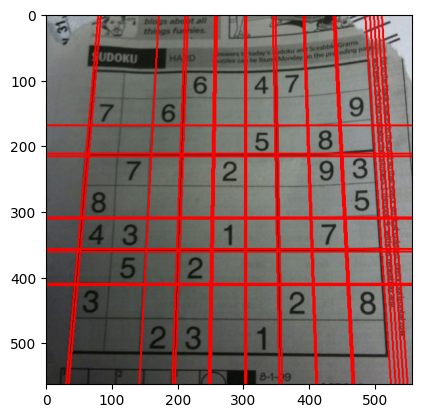

True

In [1]:
# 課題 4-1 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# 直線の本数を取得
num_lines = len(lines)

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

print("number of lines:"+str(num_lines))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("lesson4-1.png",img)


### 課題 4-2
配布しているzipファイル内の画像とは別の画像を用意して
それに対して直線検出を行い
検出された直線を図示した画像を保存せよ。
入力画像は直線が多く含まれるものが望ましい。
また、5本以上の直線を検出できるよう
画像やパラメータを選ぶこと。

プログラムコードだけでなく、元となった画像と生成結果の
画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson4-2-input.png`
（JPEGファイルであれば `lesson4-2-input.jpg` ）とし、
結果のファイル名は `lesson4-2.png` とすること。

number of lines:36


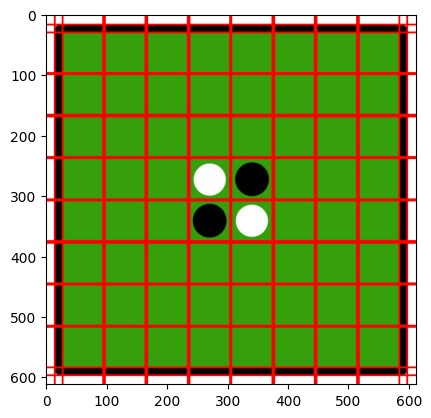

True

In [4]:
# 課題 4-2 code解答欄
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lesson4-2-input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# 直線の本数を取得
num_lines = len(lines)

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

print("number of lines:"+str(num_lines))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("lesson4-2.png",img)

### 課題 4-3
配布しているzipファイル内の画像とは異なる画像で
円を複数含む画像を用意し、円検出を行って検出された
円を図示した画像を表示、保存せよ。

3つ以上の円が検出されるよう画像やパラメータを選び、
プログラムコードだけでなく、元となった画像と生成結果の
画像も画像ファイルとして提出すること。
元画像のファイル名は `lesson4-3-input.png`
（JPEGファイルであれば `lesson4-3-input.jpg` ）とし、
結果のファイル名は `lesson4-3.png` とすること。


>ヒント
>
> `HoughCircles` 関数の仕様については
[OpenCV 4.1.2のリファレンスマニュアル](https://docs.opencv.org/4.1.2/)
から検索して参照するとよい。

True

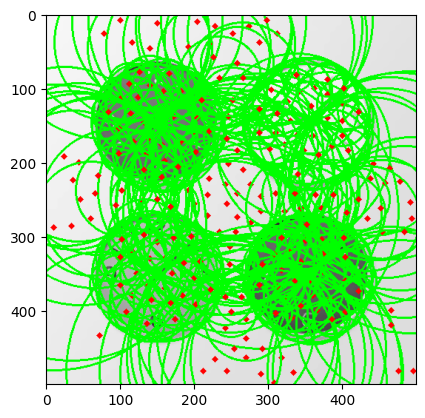

In [5]:
# 課題 4-3 code解答欄
import cv2
import numpy as np

img = cv2.imread('lesson4-3-input.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
cv2.imwrite("lesson4-3.png",cimg)


## Grabcutによる領域分割
<a href="http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html">
OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 » GrabCutを使った対話的前景領域抽出
</a>

grabcutは色や模様が一様な領域を自動的に抽出するための
アルゴリズムである。
アルゴリズムの詳細は割愛するが、全自動での領域抽出を行う
ことができ、
さらに前景(foreground)と背景（background)の領域の一部を
教師として与えると、
それに合わせて抽出結果をチューニングすることができる。


### 課題 4-4
チュートリアルにあるコードは非対話的な自動抽出をする
コードである。
`lena.jpg` に対し実行して結果を表示、保存せよ。
但し、 `cv2.grabCut()` 関数の第3引数は前景領域を囲む矩形を
指定する引数である。
`lena.jpg` に写っている人物の顔が前景領域として抽出されるよう
調整すること。

結果のファイル名は `lesson4-4.png` とすること。




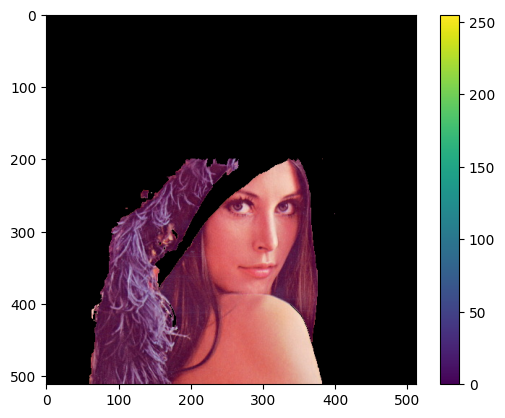

True

In [ ]:
# 課題 4-4 code解答欄
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,200,350,500)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.colorbar(),plt.show()
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("lesson4-4.png",img)

### 課題 4-5
課題4-4で使用した `lena.jpg` とも
配布しているzipファイル内の画像とも異なる画像で、
前景と背景とを区別しやすい画像を用意し前景領域を自動的に抽出せよ。
`grabCut`関数に与えるパラメータは前景部分をうまく
抽出できるよう適宜調整せよ。
プログラムコードだけでなく、元となった画像と生成結果の
画像も画像ファイルとして提出すること。

元画像のファイル名は `lesson4-5-input.png`
（JPEGファイルであれば `lesson4-5-input.jpg` ）とし、
結果のファイル名は `lesson4-5.png` とすること。

>ヒント
>
> `grubCut` 関数の仕様については
[OpenCV 4.1.2のリファレンスマニュアル](https://docs.opencv.org/4.1.2/)


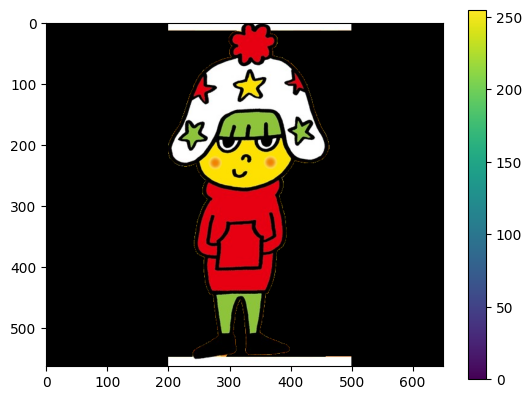

True

In [ ]:
# 課題 4-5 code解答欄
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lesson4-5-input.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (200,0,300,600)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.colorbar(),plt.show()
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("lesson4-5.png",img)

## SIFT特徴の抽出
- [OpenCV-Pythonチュートリアル » 特徴量検出と特徴量記述 » 特徴の理解](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html)
- [OpenCV-Pythonチュートリアル » 特徴量検出と特徴量記述 » SIFT (Scale-Invariant Feature Transform)の導入](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)

**SIFT**(Scale Invariant Feature Transform)特徴は、
スケール不変（拡大縮小、回転しても同じ特徴として検出される）
特徴記述の一つである。
抽出するためのアルゴリズムは複雑だが、OpenCVの関数を使えば
簡単に利用することができる。
特徴点の位置とスケール、向き、だけでなく、その点の回りで
どのような模様になっているかを表現する記述子(descriptor)を
取得することができる。

この特徴を用いれば、ある画像に写っている物体が
別の画像内に写っているかどうか、写っているとすれば
どこにどういう角度で写っているのかなどを知ることができる。

### OpenCVでSIFTを利用する際の注意点
SIFTアルゴリズムの特許の関係で、最新のOpenCVライブラリからは
SIFT特徴を計算する関数が取り除かれている。
そのため、Google Colaboratory環境上でSIFTの計算を行う際には
事前にOpenCVのライブラリをダウングレードしておく必要がある。
下記のコードを実行すればSIFTの機能を含むバージョンのOpenCVに
ダウングレードできる。
ダウングレード後、ランタイムを再起動することで
OpenCV 3.4.2.17の環境が利用できる状態となる。

In [ ]:
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.17 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.17


但し、現在実行中のruntimeで既に `cv2` や
`numpy` などのモジュールが `import` されて
使用中の場合は、ダウングレードを
実行してもruntimeを再起動するまでは
ダウングレード前のライブラリが有効であることに
注意が必要である。

ダウングレード時に下記のようなメッセージが
表示された場合は
runtimeの再起動が必要である。
> WARNING: The following packages were previously imported in this runtime:
  [cv2,numpy]
You must restart the runtime in order to use newly installed versions.

現在のGoogle Colaboratory環境で使用されている
OpenCVライブラリのバージョンを確認するには、
下記のコードを実行すればよい。

In [ ]:
import cv2
print('Avairable OpenCV version: %s' % (cv2.getVersionString(),))

Avairable OpenCV version: 4.7.0


また、チュートリアルに記載されているコードはOpenCV 2.X系の環境を
前提としているので、そのままではGoogle Colaboratory環境上で
動作させることができないことに注意すること。

In [ ]:
# 現在のランタイム環境（Googleの提供してくれているサーバ上の環境）に
# インストールされているpipパッケージの一覧を表示するコマンド
!pip freeze

In [ ]:
# 下記のコマンドを実行すると opencv-contrib-pythonのパッケージで、
# 利用可能なバージョンの一覧を確認できます。
# （エラーメッセージ内にバージョン一覧が表示されます）
!pip install opencv-contrib-python==

### 課題 4-6
下記はSIFT特徴を抽出するチュートリアルのコードを
OpenCV 3.x系, OpenCV 4.x系でも動作するよう修正したものである。
まず、これを実行して `opencv-logo2.png` のどのような点が
特徴点として抽出されるか確認せよ。
（`opencv-logo2.png`についての結果は提出不要である）

その後、配布しているzipファイル内の画像とは異なる画像について
抽出を行うようコードを変更して
実行し、その結果を保存して入力画像とともにZIPファイルに含めて
提出せよ。
元画像のファイル名は `lesson4-6-input.png`
（JPEGファイルであれば `lesson4-6-input.jpg` ）とし、
結果のファイル名は `lesson4-6.png` とすること。


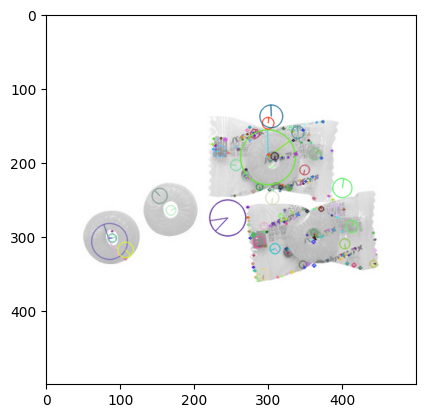

In [ ]:
# 課題 4-6 code解答欄
# 下記ではSIFT機能を利用しているため、事前に下記のコマンドで環境を準備しておく必要がある。
# !pip install opencv-contrib-python==3.4.2.17 --force-reinstall
#_
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lesson4-6-input.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

cv2.drawKeypoints(gray,kp,img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('lesson4-6.png',img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## FLANNによる特徴点マッチング
- [OpenCV-Pythonチュートリアル » 特徴量検出と特徴量記述 » 特徴点のマッチング](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_feature2d/py_matcher/py_matcher.html)

### 課題 4-7
資料に添付している画像ファイル `box.png` に写っている本を
`box_in_scene.png` の風景から探すために、対応する特徴点を探し
照合して結果を画像として保存せよ。
（これらの画像ファイルは https://github.com/opencv/opencv/tree/master/samples/data からダウンロードすることもできる）

結果のファイル名は `lesson4-7.png` とすること。
チュートリアルの一番下にあるFLANNマッチングのみ試せばよい。

>**ヒント**
>
>チュートリアルのコードはPython 2.Xの環境を前提としており `xrange` を
使用しているがこの関数はPython 3.X以降では廃止されているためそのままでは
実行できない。 `xrange` の部分は `range` に置き換える必要がある。


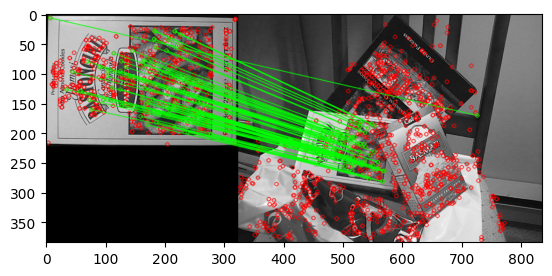

True

In [ ]:
# 課題 4-7 code解答欄
# 下記ではSIFT機能を利用しているため、事前に下記のコマンドで環境を準備しておく必要がある。
# !pip install opencv-contrib-python==3.4.2.17 --force-reinstall

import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
cv2.imwrite("lesson4-7.png",img3)

In [ ]:
cv2.__version__

'4.7.0'

## 対応付けに基づくホモグラフィ（射影行列）の計算
- [OpenCV-Pythonチュートリアル » 特徴量検出と特徴量記述 » 特徴点のマッチングとHomographyによる物体検出](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html)

特徴点の対応付けが得られるとホモグラフィを計算することができる。
ホモグラフィとは透視変換のカメラ（近くが大きく、遠くが小さく映る）で長方形を撮影するとどのように歪んで映るか、を計算するための情報である
（詳細は各自調べてみよ）。


### 課題 4-8
チュートリアルにあるコードを参考にして、
あるテンプレート画像（見本画像）を別の画像の中から探して
領域を検出して表示、保存するプログラムを作成せよ。
資料に添付されている `box.png` をテンプレート画像
としこれを `box_in_scene.png` から探して領域を表示できる
ことを確認せよ。

結果のファイル名は `lesson4-8.png` とすること。



注意）
- チュートリアルでは `print ...` のように `print` 機能を関数ではなく
特殊な文として記述している。
これはPython 2.X以前の書き方であり、Python 3以降の環境ではエラーとなる。
Python 3環境では関数としての記述となるよう、
引数を `()` で囲み、 `print(...)` のように書く必要がある。
- チュートリアルのコードでは画像によってはエラーになる場合がある（とくにカメラからのキャプチャ画像を連続的に処理するコードの場合におきる）。
その場合は、 `np.sum(matchesMask)` が少なくとも4以上になっている場合にだけ、`cv2.polylines()` による矩形描画を実行するように改造すると避けられる。

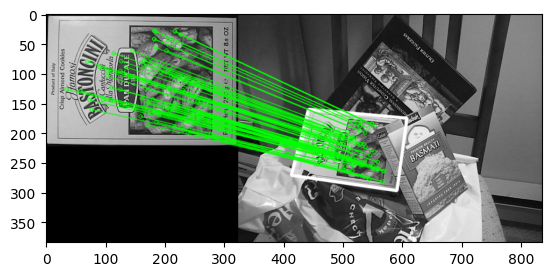

True

In [ ]:
# 課題 4-8 code解答欄
# 下記ではSIFT機能を利用しているため、事前に下記のコマンドで環境を準備しておく必要がある。
# !pip install opencv-contrib-python==3.4.2.17 --force-reinstall
#_
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()
cv2.imwrite("lesson4-8.png",img3)

### 課題 4-9
課題 4-8で作成したプログラムをベースに、
改めて **ある物体を正面からとらえたテンプレート画像**
と **その物体が写っている風景の画像** を用意して
風景中の物体を検出し、結果を表示、保存せよ。
検出実験は「テンプレートとする物体が平面である場合」と
「そうでない場合」を
含む**複数回**実験せよ。
テンプレート画像、風景画像のどちらも配布している画像とは異なるものを用い、複数回に渡る実験結果を並べて表示すること。
物体が平面の場合についてはうまく対応が取れるよう
風景画像のアングルを調整すること。
物体が平面でない場合についてはうまく対応がとれないかもしれない。
課題4-10の考察で参照しやすい実験結果が得られるよう
考慮すると良い。

提出の際、各検出実験ごとに番号を付けたファイル名とする。
例えば1回目の実験で
入力とするテンプレート画像は `lesson4-9-template-1.png` とし
風景画像は `lesson4-9-scene-1.png` 、
マッチングと検出の結果画像は `lesson4-9-result-1.png` という名前にすること。
（各実験ごとに末尾の数字をそれぞれ変更する）


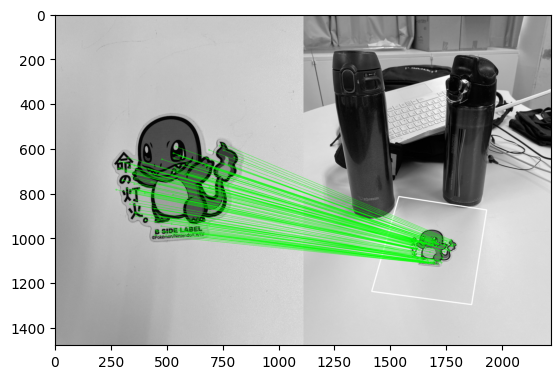

True

In [ ]:
# 課題 4-9 code解答欄
# 下記ではSIFT機能を利用するため、事前に下記のコマンドで環境を準備しておく必要がある。
# !pip install opencv-contrib-python==3.4.2.17 --force-reinstall
#_
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('lesson4-9-template-1.jpg',0)          # queryImage
img2 = cv2.imread('lesson4-9-scene-1.jpg',0) # trainImage


# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)



img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.subplot(111),plt.imshow(img3, 'gray')

plt.show()
cv2.imwrite("lesson4-9-result-1.png",img3)



Not enough matches are found - 6/10


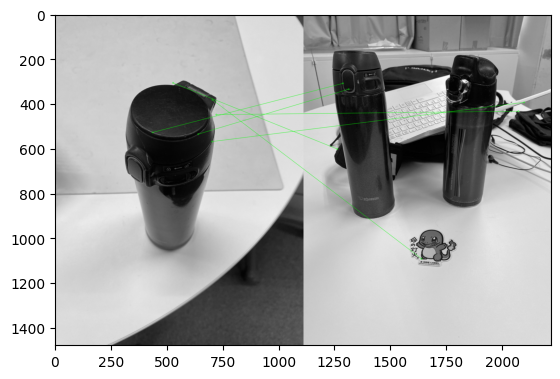

True

In [6]:
# 課題 4-9 code解答欄
# 下記ではSIFT機能を利用するため、事前に下記のコマンドで環境を準備しておく必要がある。
# !pip install opencv-contrib-python==3.4.2.17 --force-reinstall
#_
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('lesson4-9-template-2.jpg',0)          # queryImage
img2 = cv2.imread('lesson4-9-scene-1.jpg',0) # trainImage


# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)



img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.subplot(111),plt.imshow(img3, 'gray')

plt.show()
cv2.imwrite("lesson4-9-result-2.png",img3)

### 課題 4-10
本来、ホモグラフィの計算においては物体は「平面」である必要がある
（本の表紙などがわかりやすい）。
そこであえて物体が平面でない場合はどうなるか（特徴点抽出はどうなるか、
マッチングはどうなるか、物体検出はどうなるか等）に
ついて実験結果を踏まえてまとめ、なぜそうなるかについて
考察して **課題4-10 (解答欄)** のテキストセルに記せ。

### 課題 4-10 (解答欄)

#### 物体が平面でない場合に実験した結果どうなったか
物体が平面でない場合特徴点がうまく結びつかず、ほかの写真に写った物体を検出できなかった。

#### なぜそうなるか
物体が平面でない場合、特徴点抽出において物体は複雑な形を持ち視点の変化や変形によって見え方が変わるため、特徴点のマッチングが難しくなるのだと考えられる。